In [131]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [144]:
g = 9.8 
t_end = 5
dt = 1 
t_0 = 0

init_z = State(y=100.0, v=0.0 )
init_x = State(y=0.0, v=500.0 )
system_z = System(init=init_z, g=g,t_0=t_0, t_end=t_end, dt=dt)
system_x = System(init=init_x,t_0=t_0,  t_end=t_end, dt=dt)

,values
init,y 0.0 v 500.0 dtype: float64
t_0,0
t_end,5
dt,1


# 定义二阶Adams函数

In [145]:
def run_Adams_2(system,slope_func):
    
    init, t_0, t_end, dt = system.init, system.t_0,system.t_end, system.dt
    
    frame,details=run_euler(system,slope_func)
    ts=linrange(t_0+dt,t_end,dt)
    
    for t1 in ts:
        y1 = frame.row[t1]
        slopes = slope_func(y1, t1, system)
        y2 = [y + 3/2*slope * dt for y, slope in zip(y1, slopes)]
        
        y1 = frame.row[t1-dt]
        slopes = slope_func(y1, t1-dt, system)
        y2 = [y - 1/2*slope * dt for y, slope in zip(y2, slopes)]
        
        t2 = t1 + dt
        frame.row[t2] = y2
    return frame

In [146]:
def slope_func_z(state,t,system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

In [147]:
def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0
    
    return dydt, dvdt

# 用二阶Adams法实现炮弹问题

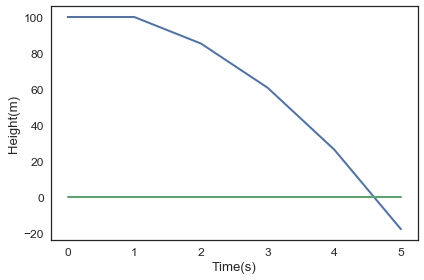

In [149]:
results1_z = run_Adams_2(system_z, slope_func_z)
results1_x = run_Adams_2(system_x, slope_func_x)

plot(results1_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,1,2,3,4,5]
y=[0,0,0,0,0,0]
plot(x,y)

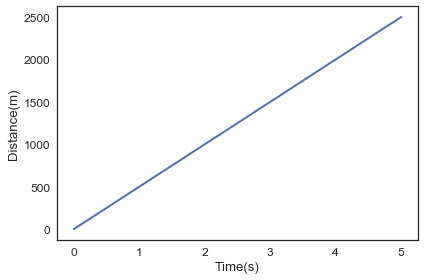

In [150]:
plot(results1_x.y)
decorate(xlabel='Time(s)',
         ylabel='Distance(m)')

# 用欧拉法实现炮弹问题

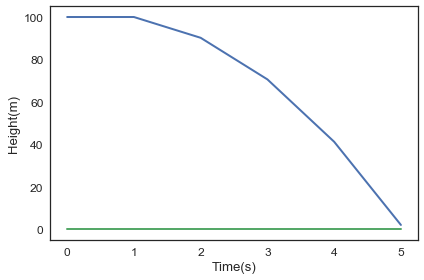

In [151]:
results2_z, details_z = run_euler(system_z, slope_func_z)
results2_x, details_x = run_euler(system_x, slope_func_x)

plot(results2_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,1,2,3,4,5]
y=[0,0,0,0,0,0]
plot(x,y)

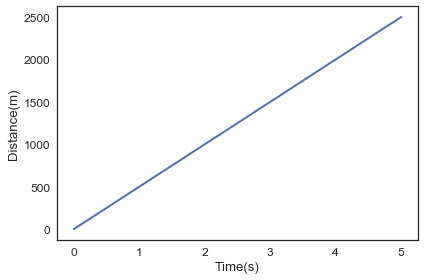

In [152]:
plot(results2_x.y)
decorate(xlabel='Time(s)',
         ylabel='Distance(m)')

# 定义四阶Runge-Kutta法函数

In [153]:
def run_rk4(system,slope_func):
    init, t_0, t_end, dt = system.init, system.t_0,system.t_end, system.dt
    
    frame,details=run_euler(system,slope_func)
    ts=linrange(t_0+dt*3,t_end,dt)
    
    for t1 in ts:
        y1=frame.row[t1]
        slopes=slope_func(y1,t1,system)
        y_0=[y+1/6*slope*dt for y,slope in zip(y1,slopes)]
        
        y2=[y+1/6*slope*dt/2 for y,slope in zip(y1,slopes)]
        slopes=slope_func(y2,t1+dt/2,system)
        y_0=[y+2/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        y3=[y+2/6*slope*dt/2 for y,slope in zip(y1,slopes)]
        slopes=slope_func(y3,t1+dt/2,system)
        y_0=[y+2/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        y4=[y+2/6*slope*dt for y,slope in zip(y1,slopes)]
        slopes=slope_func(y4,t1+dt,system)
        y_0=[y+1/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        t2=round(t1+dt,2)
        frame.row[t2]=y_0

    return frame

# 用四阶Runge-Kutta法现现炮弹问题

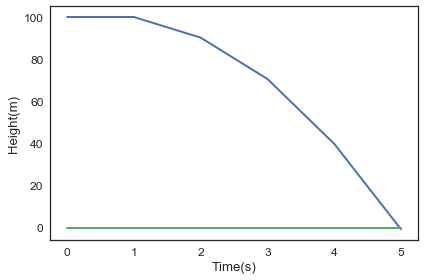

In [154]:
results3_z = run_rk4(system_z, slope_func_z)
results3_x = run_rk4(system_x, slope_func_x)

plot(results3_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,1,2,3,4,5]
y=[0,0,0,0,0,0]
plot(x,y)

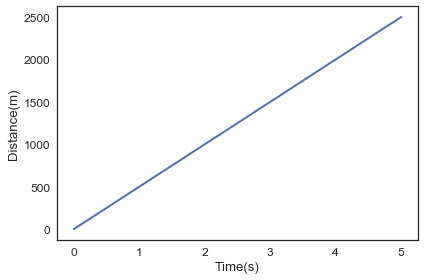

In [155]:
plot(results3_x.y)
decorate(xlabel='Time(s)',
         ylabel='Distance(m)')

# 将三种算法绘制在同一张表中

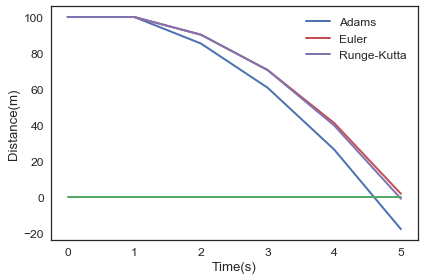

In [156]:
plot(results1_z.y,label='Adams')
plot(results2_z.y,label='Euler',color='C2')
plot(results3_z.y,label='Runge-Kutta',color='C3')
decorate(xlabel='Time(s)',ylabel='Distance(m)')

x=[0,1,2,3,4,5]
y=[0,0,0,0,0,0]
plot(x,y)

根据计算知落地时间为4.52秒，故就精确度而言，二阶Adams法>Runge-Kutta法>欧拉法